In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

### Standard Scalar-

Standardize features by removing the mean and scaling to unit variance.Calculated as-

z = (x - u) / s

where u is the mean of the training samples and s is the standard deviation of the training samples.

### Truncated SVD-

Truncated Singular Value Decomposition (TSVD) is a dimensionality reduction technique that, like standard Singular Value Decomposition (SVD), decomposes a matrix into three matrices (U, Σ, and V^T), but it only retains the top k singular values and their corresponding vectors, resulting in a lower-dimensional representation

Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

### Bejaia data set - SVD

* reading the Bejaia datasets

In [3]:
bejaia_df = pd.read_excel('BR_dataset.xlsx')

features = [
    "Temperature", "RH", "Ws", "Rain", "FWI",
    "FFMC", "DMC", "DC", "ISI", "BUI"
]

X_bejaia = bejaia_df[features]
y_bejaia = bejaia_df["Classes"]

In [4]:
bejaia_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


* Standard scaling & applying truncated SVD

In [5]:
scaler = StandardScaler()
X_bejaia_scaled = scaler.fit_transform(X_bejaia)

In [ ]:
#calculating SVD
U_b, S_b, Vt_b = np.linalg.svd(X_bejaia_scaled, full_matrices=False)

# Truncate to 2 dimensions
U_b_trunc = U_b[:, :2]
S_b_trunc = np.diag(S_b[:2])
Vt_b_trunc = Vt_b[:2, :]

#projecting into 2d
X_b_reduced = np.dot(U_b_trunc, S_b_trunc)


* plotting the results

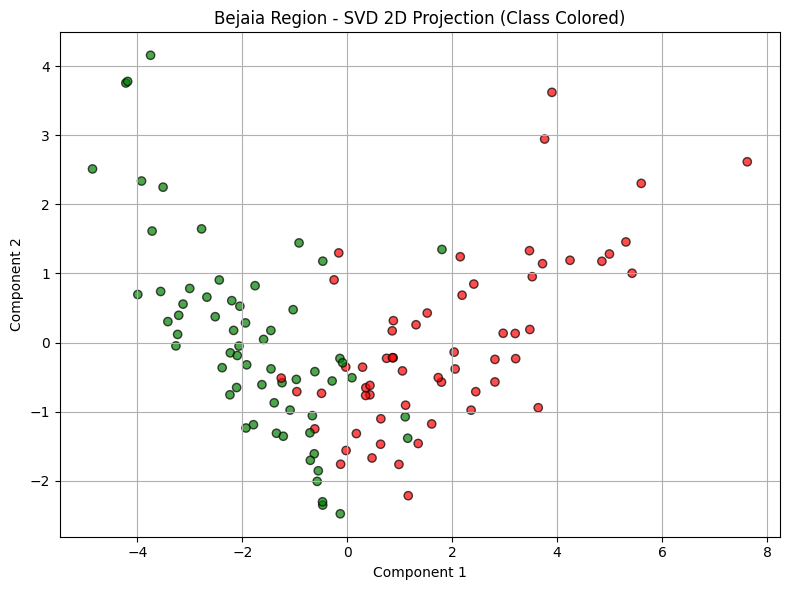

In [7]:
colors = ['red' if cls.strip().lower() == 'fire' else 'green' for cls in y_bejaia]
plt.figure(figsize=(8, 6))
plt.scatter(X_b_reduced[:, 0], X_b_reduced[:, 1], c=colors, alpha=0.7, edgecolor='k')
plt.title("Bejaia Region - SVD 2D Projection (Class Colored)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.tight_layout()
#plt.savefig("bejaia_svd_class_colored.png")
plt.show()

### Sidi Bel-abbes data set - SVD

In [8]:
sbar_df = pd.read_excel('SBAR_dataset.xlsx')

features = [
    "Temperature", "RH", "Ws", "Rain", "FWI",
    "FFMC", "DMC", "DC", "ISI", "BUI"
]

X_sbar = sbar_df[features]
y_sbar = sbar_df["Classes"]

* Standard scaling & applying truncated SVD

In [9]:
scaler = StandardScaler()
X_sbar_scaled = scaler.fit_transform(X_sbar)

In [10]:
#calculating SVD
U_b1, S_b1, Vt_b1 = np.linalg.svd(X_sbar_scaled, full_matrices=False)

# Truncate to 2 dimensions
U_b_trunc1 = U_b1[:, :2]
S_b_trunc1 = np.diag(S_b1[:2])
Vt_b_trunc1 = Vt_b1[:2, :]

#projecting into 2d
X_b_reduced1 = np.dot(U_b_trunc1, S_b_trunc1)


* plotting the results

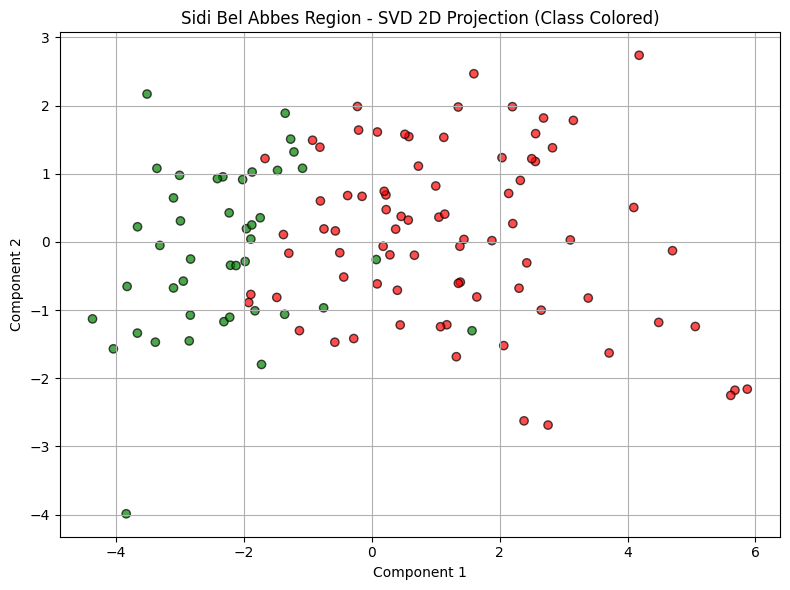

In [11]:
colors = ['red' if cls.strip().lower() == 'fire' else 'green' for cls in y_sbar]
plt.figure(figsize=(8, 6))
plt.scatter(X_b_reduced1[:, 0], X_b_reduced1[:, 1], c=colors, alpha=0.7, edgecolor='k')
plt.title("Sidi Bel Abbes Region - SVD 2D Projection (Class Colored)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.tight_layout()
#plt.savefig("sbar_svd_class_colored.png")
plt.show()